In [1]:
import sys
import os
import matplotlib.pyplot as plt
sys.path.append('..')
from src.algorithm import *

# Load data

In [2]:
rel_rots,rel_rot_inds,rots_gt,valid_inds = load_Ellis('../data/Ellis.mat')

# L1 rotation averagin

In [15]:
steps = 10 # Weizfeld steps
iterations = 5 # max iterations
t1 = time.time()
rots_pred = multiple_rotation_averaging(rel_rots,rel_rot_inds,rots_gt.shape[0],
                                        steps=steps,max_iterations=iterations)
t2 = time.time()
print('Time cost is {:.3f} s'.format(t2-t1))

rots_pred_ = [rots_pred[ind] for ind in valid_inds]
rots_gt_ = [rots_gt[ind] for ind in valid_inds]

rots_aligned = align_rotation(rots_pred_,rots_gt_)
errors = get_errors(rots_gt_,rots_aligned)
errors.sort()
n = len(errors)
if n%2==0:
    error = (errors[n//2]+errors[n//2-1])/2
else:
    error = errors[n//2]
print('Median error is {:.3f} degree'.format(error))

 80%|████████████████████████████████████         | 4/5 [00:28<00:07,  7.15s/it]

# Plot error distribution

Text(0, 0.5, '# Images')

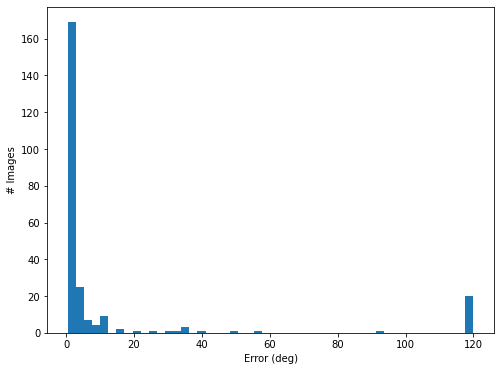

In [14]:
plt.rcParams['figure.figsize'] = [8,6]
plt.hist(errors,bins=50)
plt.xlabel('Error (deg)')
plt.ylabel('# Images')